In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [4]:
#reading the file
df = pd.read_csv("gym_members_exercise_tracking.csv")
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [5]:
# Check for missing values
print(df.isnull().sum())

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


In [6]:
#summary statistics for numerical columns
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [7]:
#Workout Type with Lowest Average BMI
df.groupby("Workout_Type")["BMI"].min().sort_values()

Workout_Type
Cardio      12.32
Yoga        12.73
Strength    12.91
HIIT        12.97
Name: BMI, dtype: float64

In [8]:
# Check unique values in categorical columns
print(df['Gender'].value_counts())
print(df['Workout_Type'].value_counts())
print(df['Experience_Level'].value_counts().sort_index())

Gender
Male      511
Female    462
Name: count, dtype: int64
Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64
Experience_Level
1    376
2    406
3    191
Name: count, dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [17]:
# Generate a correlation matrix using corr()
df_numerical = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_numerical.corr()
print(correlation_matrix)

                                    Age  Weight (kg)  Height (m)   Max_BPM  \
Age                            1.000000    -0.036340   -0.027837 -0.017073   
Weight (kg)                   -0.036340     1.000000    0.365321  0.057061   
Height (m)                    -0.027837     0.365321    1.000000 -0.017660   
Max_BPM                       -0.017073     0.057061   -0.017660  1.000000   
Avg_BPM                        0.035969     0.009717   -0.014776 -0.039751   
Resting_BPM                    0.004354    -0.032138   -0.005090  0.036647   
Session_Duration (hours)      -0.019912    -0.013666   -0.010206  0.010051   
Calories_Burned               -0.154679     0.095443    0.086348  0.002090   
Fat_Percentage                 0.002370    -0.225512   -0.235521 -0.009056   
Water_Intake (liters)          0.041528     0.394276    0.393533  0.031621   
Workout_Frequency (days/week)  0.008055    -0.011769   -0.011270 -0.029099   
Experience_Level              -0.018676     0.003379   -0.010267

In [19]:
#bar chart
def plot_workout_type_distribution(data):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Workout_Type', data=data)
    plt.title('Distribution of Workout Types')
    plt.xlabel('Workout Type')
    plt.ylabel('Count')
    plt.savefig("bar.jpg")

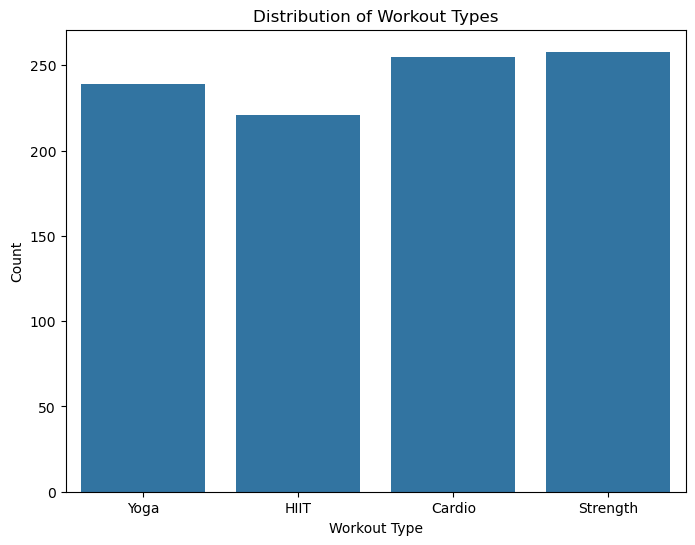

In [21]:
plot_workout_type_distribution(df)


In [29]:
#histogram
def plot_age_distribution(data):
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Age'], bins=10, kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')  
    plt.savefig("histogram.jpg")

# Calculate skewness and kurtosis
age_skewness = skew(df['Age'])
age_kurtosis = kurtosis(df['Age'], fisher=False)  
print("Skewness:", age_skewness)
print("Kurtosis:", age_kurtosis)

Skewness: -0.07774387389408381
Kurtosis: 1.7849987446553108


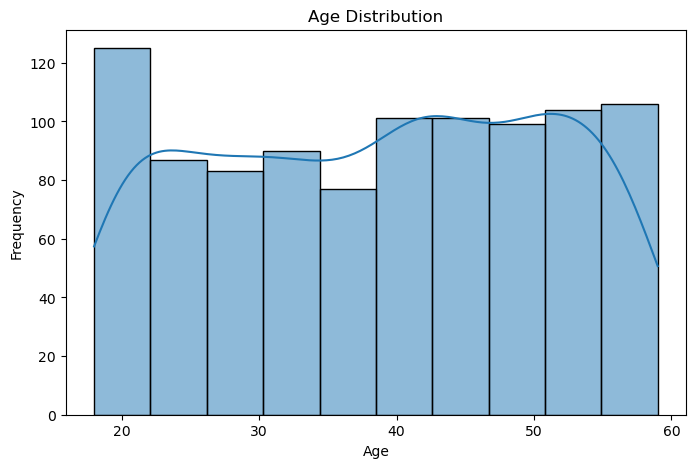

In [31]:
plot_age_distribution(df)

In [33]:
#Scatter plot of BMI vs Calories Burned
def plot_bmi_vs_calories_burned(data):
    plt.figure(figsize=(8, 6))
    plt.scatter(data['BMI'], data['Calories_Burned'], alpha=0.7)
    plt.title('Calories Burned vs BMI')
    plt.xlabel('BMI')
    plt.ylabel('Calories Burned')
    plt.savefig("scatter.jpg")

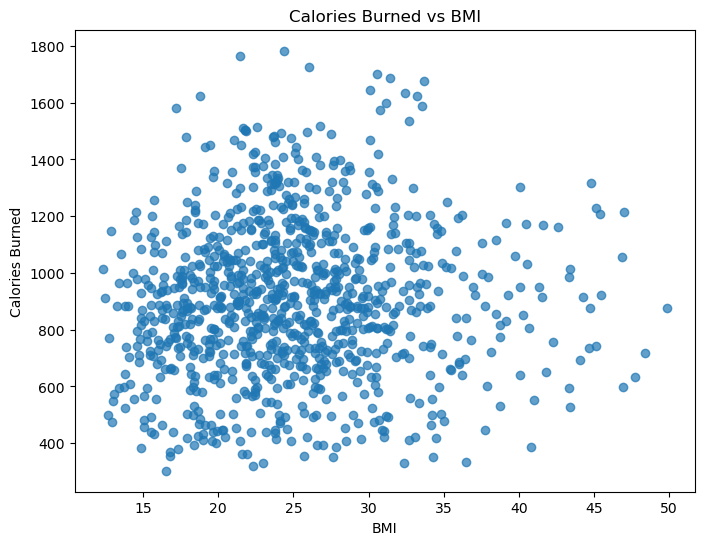

In [35]:
plot_bmi_vs_calories_burned(df)


In [37]:
#Heatmap of the correlation matrix
def plot_correlation_heatmap(data):
    correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
    plt.figure(figsize=(7, 5))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title('Correlation Heatmap')
    plt.savefig("heatmap.jpg")

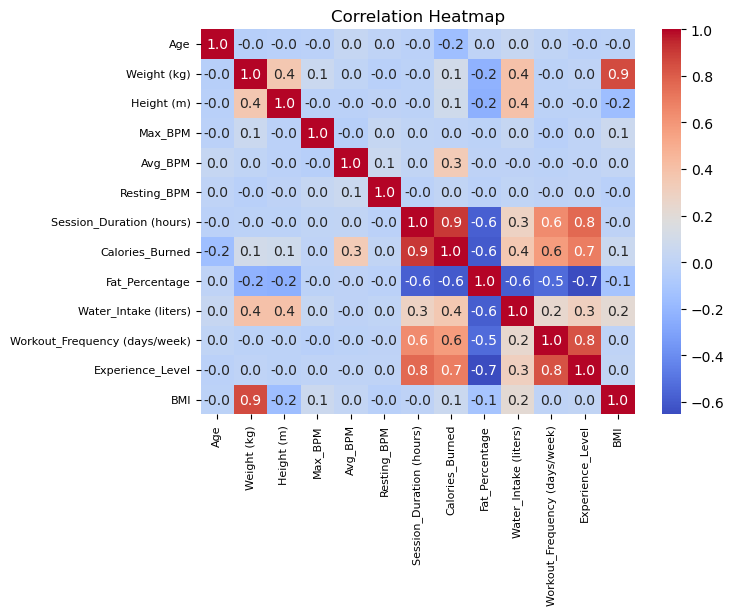

In [39]:
plot_correlation_heatmap(df)